In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train=pd.read_excel("/content/drive/My Drive/fwdfliprhackathon6_0machinelearningtask/Train_dataset.xlsx")
test=pd.read_excel("/content/drive/My Drive/fwdfliprhackathon6_0machinelearningtask/Test_dataset.xlsx")

In [3]:
train.head(10)

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204
5,Chennai,Tamil Nadu,MPUA,4681087.0,4343645.0,904.0,26.0,31.0,HIGH,210.0,179.0,0.536995,4231703.0,67.0,4684707.0,145606
6,Chennai,Tamil nadu,T,4646732.0,NaN,912.0,26.0,30.0,MEDIUM,145.0,177.0,0.093451,4237820.0,55.0,4684707.0,145606
7,Kolkata,West Bengal,MPUA,4486679.0,4572876.0,945.0,26.0,37.0,NaN,NaN,NaN,0.473585,4239912.0,82.0,1489500.0,44957
8,Surat,Gujarat,MPUA,4467797.0,2433835.0,NaN,27.0,26.0,NaN,NaN,NaN,0.809334,3797627.0,98.0,284973.0,23432
9,Pune,Maharashtra,MPUA,3124458.0,2538473.0,NaN,29.0,29.0,NaN,NaN,NaN,0.445902,2743274.0,50.0,4408916.0,218502


In [4]:
train.drop(['Popuation [2001]'],axis=1,inplace=True)
test.drop(['Popuation [2001]'],axis=1,inplace=True)

In [5]:
list1=["Population [2011]","Sex Ratio","Median Age","Avg Temp","Toilets Avl","Water Purity","H Index","Female Population","# of hospitals","Foreign Visitors"]   
list2=["Type","SWM"]

for i in list1:
    
    train.replace(np.NaN,{i:train[i].median()},inplace=True)
    test.replace(np.NaN,{i:train[i].median()},inplace=True)
    
for i in list2:
    
    train.replace(np.NaN,{i:test[i].value_counts().idxmax()},inplace=True)
    test.replace(np.NaN,{i:test[i].value_counts().idxmax()},inplace=True)
    
    
train.head(15)

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204
5,Chennai,Tamil Nadu,MPUA,4681087.0,904.0,26.0,31.0,HIGH,210.0,179.0,0.536995,4231703.0,67.0,4684707.0,145606
6,Chennai,Tamil nadu,T,4646732.0,912.0,26.0,30.0,MEDIUM,145.0,177.0,0.093451,4237820.0,55.0,4684707.0,145606
7,Kolkata,West Bengal,MPUA,4486679.0,945.0,26.0,37.0,LOW,92.0,150.0,0.473585,4239912.0,82.0,1489500.0,44957
8,Surat,Gujarat,MPUA,4467797.0,906.0,27.0,26.0,LOW,92.0,150.0,0.809334,3797627.0,98.0,284973.0,23432
9,Pune,Maharashtra,MPUA,3124458.0,906.0,29.0,29.0,LOW,92.0,150.0,0.445902,2743274.0,50.0,4408916.0,218502


In [6]:
test.isnull().sum()

City                 0
State                0
Type                 0
Population [2011]    0
Sex Ratio            0
Median Age           0
Avg Temp             0
SWM                  0
Toilets Avl          0
Water Purity         0
H Index              0
Female Population    0
# of hospitals       0
Foreign Visitors     0
dtype: int64

In [7]:
train.drop(['Type'],axis=1,inplace=True)
test.drop(['Type'],axis=1,inplace=True)

In [8]:
test.head()

,City,State,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,Tuensang,Nagaland,36774.0,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,Lakshmeshwar,Karnataka,36754.0,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,Zira,Punjab,36732.0,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,Yawal,Maharashtra,36706.0,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,Thana Bhawan,Uttar Pradesh,36669.0,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0


In [9]:
test.shape

(501, 13)

In [10]:
train.shape

(787, 14)

In [11]:
train.replace({'MEDIUM':2,'LOW':1,'HIGH':3},inplace=True)
test.replace({'MEDIUM':2,'LOW':1,'HIGH':3},inplace=True)

In [12]:

from sklearn.preprocessing import MinMaxScaler

# from sklearn.preprocessing import StandardScaler

list3=['Population [2011]','Sex Ratio','Median Age','Avg Temp','SWM','Toilets Avl','Water Purity','H Index','Female Population','# of hospitals','Foreign Visitors','Covid Cases']

scaler=MinMaxScaler()
train[['Population [2011]','Sex Ratio','Median Age','SWM','Avg Temp','Toilets Avl','Water Purity','H Index','Female Population','# of hospitals','Foreign Visitors']] = scaler.fit_transform(train[['Population [2011]','Sex Ratio','Median Age','SWM','Avg Temp','Toilets Avl','Water Purity','H Index','Female Population','# of hospitals','Foreign Visitors']])

In [13]:
from sklearn.preprocessing import MinMaxScaler

# from sklearn.preprocessing import StandardScaler


test[['Population [2011]','Sex Ratio','Median Age','SWM','Avg Temp','Toilets Avl','Water Purity','H Index','Female Population','# of hospitals','Foreign Visitors']] = scaler.fit_transform(test[['Population [2011]','Sex Ratio','Median Age','SWM','Avg Temp','Toilets Avl','Water Purity','H Index','Female Population','# of hospitals','Foreign Visitors']])

In [14]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in train.columns.values]


In [15]:
test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test.columns.values]

In [16]:
train.drop(['City'],axis=1,inplace=True)
test.drop(['City'],axis=1,inplace=True)

In [17]:
train.head(5)

,State,Population _2011_,Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Maharashtra,1.000000,0.267857,0.000000,0.771429,0.5,0.954802,0.50,0.699675,1.000000,1.000000,0.941119,163115
1,Delhi,0.884364,0.178571,0.444444,0.714286,0.5,0.932203,0.96,0.919980,0.864168,0.926174,0.507775,80188
2,Karnataka,0.677106,0.526786,0.555556,0.914286,1.0,0.915254,0.02,0.094322,0.722066,0.758389,0.135721,141000
3,Telangana,0.545979,0.500000,0.000000,0.742857,0.5,0.943503,0.18,0.827401,0.578544,0.671141,0.026747,55123
4,Gujarat,0.446074,0.151786,0.666667,0.571429,0.0,1.000000,0.09,0.847665,0.432848,0.422819,0.060670,33204


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0, 0, 'Maharashtra'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Karnataka'),
 Text(0, 0, 'Telangana'),
 Text(0, 0, 'Gujarat'),
 Text(0, 0, 'Tamil Nadu'),
 Text(0, 0, 'Tamil nadu'),
 Text(0, 0, 'West Bengal'),
 Text(0, 0, 'Rajasthan'),
 Text(0, 0, 'Uttar Pradesh'),
 Text(0, 0, 'Madhya Pradesh'),
 Text(0, 0, 'Andhra Pradesh'),
 Text(0, 0, 'Bihar'),
 Text(0, 0, 'Punjab'),
 Text(0, 0, 'Jharkhand'),
 Text(0, 0, 'Haryana'),
 Text(0, 0, 'Jammu and Kashmir'),
 Text(0, 0, 'Chandigarh'),
 Text(0, 0, 'Chhattisgarh'),
 Text(0, 0, 'Assam'),
 Text(0, 0, 'Odisha'),
 Text(0, 0, 'Kerala'),
 Text(0, 0, 'Uttarakhand'),
 Text(0, 0, 'Tripura'),
 Text(0, 0, 'Puducherry'),
 Text(0, 0, 'Mizoram'),
 Text(0, 0, 'Manipur'),
 Text(0, 0, 'Himachal Pradesh'),
 Text(0, 0, 'Sikkim'),
 Text(0, 0, 'Andaman and Nicobar Islands'),
 Text(0, 0, 'Goa'),
 Text(0, 0, 'Nagaland'),
 Text(0, 0, 'Meghalaya')]

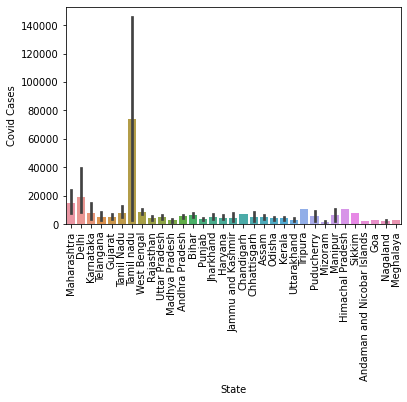

In [19]:
import seaborn as sns
ax = sns.barplot(x = 'State', y = 'Covid Cases', data = train)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [20]:


train['State'] = train['State'].replace(['Maharashtra','Delhi', 'Karnataka','Tamil nadu','Tamil Nadu','West Bengal', 'Bihar','Chandigarh','Tripura', 'Puducherry','Himachal Pradesh','Sikkim'],'high')
train['State'] = train['State'].replace([ 'Telangana','Gujarat','Rajasthan','Chhattisgarh','Goa','Uttar Pradesh','Madhya Pradesh','Andhra Pradesh','Kerala','Mizoram','Manipur','Uttarakhand','Punjab', 'Nagaland','Meghalaya','Arunachal Pradesh', 'Dadra and Nagar Haveli','Andhra pradesh','Jharkhand','Haryana', 'Assam','Odisha','Andaman and Nicobar Islands','Jammu and Kashmir',],'low')


In [21]:
categorical = ['State']

for var in categorical:
    train = pd.concat([train,pd.get_dummies(train[var], prefix=var)], axis=1)
    del train[var]

In [22]:
train.head(10)

,Population _2011_,Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases,State_high,State_low
0,1.000000,0.267857,0.000000,0.771429,0.5,0.954802,0.50,0.699675,1.000000,1.000000,0.941119,163115,1,0
1,0.884364,0.178571,0.444444,0.714286,0.5,0.932203,0.96,0.919980,0.864168,0.926174,0.507775,80188,1,0
2,0.677106,0.526786,0.555556,0.914286,1.0,0.915254,0.02,0.094322,0.722066,0.758389,0.135721,141000,1,0
3,0.545979,0.500000,0.000000,0.742857,0.5,0.943503,0.18,0.827401,0.578544,0.671141,0.026747,55123,0,1
4,0.446074,0.151786,0.666667,0.571429,0.0,1.000000,0.09,0.847665,0.432848,0.422819,0.060670,33204,0,1
5,0.374372,0.383929,0.333333,0.742857,1.0,0.903955,0.79,0.535689,0.385624,0.382550,1.000000,145606,1,0
6,0.371603,0.419643,0.333333,0.714286,0.5,0.536723,0.77,0.090676,0.386185,0.302013,1.000000,145606,1,0
7,0.358701,0.566964,0.333333,0.914286,0.0,0.237288,0.50,0.472068,0.386377,0.483221,0.317833,44957,1,0
8,0.357179,0.392857,0.444444,0.600000,0.0,0.237288,0.50,0.808929,0.345777,0.590604,0.060670,23432,0,1
9,0.248894,0.392857,0.666667,0.685714,0.0,0.237288,0.50,0.444295,0.248989,0.268456,0.941119,218502,1,0


In [23]:
test['State'] = test['State'].replace(['Maharashtra','Delhi', 'Karnataka','Tamil nadu','Tamil Nadu','West Bengal', 'Bihar','Chandigarh','Tripura', 'Puducherry','Himachal Pradesh','Sikkim'],'high')
test['State'] = test['State'].replace([ 'Telangana','Gujarat','Rajasthan','Chhattisgarh','Goa','Uttar Pradesh','Madhya Pradesh','Andhra Pradesh','Kerala','Mizoram','Manipur','Uttarakhand','Punjab', 'Nagaland','Meghalaya','Arunachal Pradesh', 'Dadra and Nagar Haveli','Andhra pradesh','Jharkhand','Haryana', 'Assam','Odisha','Andaman and Nicobar Islands','Jammu and Kashmir',],'low')

In [24]:
categorical = ['State']

for var in categorical:
    test = pd.concat([test,pd.get_dummies(test[var], prefix=var)], axis=1)
    del test[var]

In [25]:
train.drop(['State_low'],axis=1,inplace=True)
test.drop(['State_low'],axis=1,inplace=True)

In [26]:
train.shape

(787, 13)

In [27]:
test.shape

(501, 12)

In [28]:
from scipy import stats

#outlier detection and removal
z = np.abs(stats.zscore(train))
print(z)

[[14.10393397  0.75401103  1.52289321 ...  1.9190586  10.36522443
   1.30555251]
 [12.43817455  1.29809638  0.39320105 ...  0.63980778  4.87282495
   1.30555251]
 [ 9.45259037  0.82383647  0.87222461 ...  0.45851049  8.90050951
   1.30555251]
 ...
 [ 0.30115906  3.08179067  0.87222461 ...  0.79276367  0.2493391
   1.30555251]
 [ 0.30118577  0.15551715  1.04386965 ...  0.84408693  0.2952377
   0.76595923]
 [ 0.30121944  0.45476409  0.56484608 ...  1.09667132  0.29113133
   0.76595923]]


In [29]:
train=train[(z < 7).all(axis=1)]
train.shape

(779, 13)

In [30]:
train_y=train['Covid Cases']
train_x=train.drop(['Covid Cases'],axis=1)

In [31]:
train_x.head(5)

,Population _2011_,Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,State_high
4,0.446074,0.151786,0.666667,0.571429,0.0,1.000000,0.09,0.847665,0.432848,0.422819,0.060670,0
7,0.358701,0.566964,0.333333,0.914286,0.0,0.237288,0.50,0.472068,0.386377,0.483221,0.317833,1
8,0.357179,0.392857,0.444444,0.600000,0.0,0.237288,0.50,0.808929,0.345777,0.590604,0.060670,0
10,0.242583,0.236607,0.333333,0.771429,1.0,0.440678,0.72,0.889757,0.240721,0.342282,0.314804,0
11,0.224119,0.285714,0.111111,0.800000,1.0,0.412429,0.76,0.463200,0.225251,0.322148,0.662537,0


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.1,random_state=101)

In [33]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train,y_train)

[11:37:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_squared_log_error

y_test_p=model_xgb.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test,y_test_p))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_test_p)))
print('Root Mean Squared Log Error:',np.sqrt(mean_squared_log_error( y_test,y_test_p)))

Mean Absolute Error: 1557.8506954877805
Root Mean Squared Error: 3672.9436513666087
Root Mean Squared Log Error: 0.4962839150635965


In [35]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error( y_test,y_test_p)

0.24629772435085107

In [36]:
X_train.shape

(701, 12)

In [37]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=1000, input_dim=12))
    regressor.add(Dense(units=500))
    regressor.add(Dense(units=500))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor


In [38]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=64,epochs=100)

In [ ]:
results=regressor.fit(X_train,y_train)


Epoch 1/100
10/10 [==============================] - 0s 11ms/step - loss: 58906528.0000 - mae: 5313.4888 - accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 54975396.0000 - mae: 4967.5552 - accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 42122948.0000 - mae: 3652.8210 - accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 28978030.0000 - mae: 3737.9026 - accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 27989346.0000 - mae: 3647.4939 - accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 26654716.0000 - mae: 3316.6924 - accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 25451146.0000 - mae: 3421.9482 - accuracy: 0.0000e+00
Epoch 8/100
10/10 [==============================] - 0s 10ms/step - loss: 24556372.0000 - mae: 3309.9534

In [ ]:
y_pred= regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred))))

Mean Absolute Error: 2120.478399619078
Mean Squared Error: 16780999.446862962
Root Mean Squared Error: 0.6652323156236779


In [39]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb


# A parameter grid for XGBoost
params = {
        'min_child_weight': [5, 7],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.5],
        'max_depth': [3, 4, 5]
        }

xgb = xgb.XGBRegressor()

skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params,n_jobs=4,verbose=3, n_iter=4, scoring='neg_mean_squared_log_error', cv=skf.split(train_x,train_y), random_state=1001 )

random_search.fit(train_x, train_y)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[11:38:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=4)]: Done  10 out of  12 | elapsed:    3.4s remaining:    0.7s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    3.5s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f79e91360f8>,
                   error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,...
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                          

In [40]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 All results:
{'mean_fit_time': array([0.17944551, 0.23971669, 0.14215191, 0.16628011]), 'std_fit_time': array([0.00177574, 0.00218791, 0.02238453, 0.01737303]), 'mean_score_time': array([0.00601848, 0.00928783, 0.01005745, 0.00317581]), 'std_score_time': array([0.0034944 , 0.00397391, 0.00436633, 0.0006072 ]), 'param_subsample': masked_array(data=[0.5, 0.5, 0.5, 0.5],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[7, 5, 5, 5],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 3, 4],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.5, 1, 0.5, 0.5],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'subsample': 0.5, 'min_child_weight': 7, 'max_depth': 3, 'gam

In [41]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.5,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

In [42]:
model_xgb.fit(X_train,y_train)

[11:38:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.5,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

In [43]:
y_test_p=model_xgb.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test,y_test_p))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_test_p)))
print('Root Mean Squared Log Error:',np.sqrt(mean_squared_log_error( y_test,y_test_p)))

Mean Absolute Error: 1498.5280386117788
Root Mean Squared Error: 3657.004077367837
Root Mean Squared Log Error: 0.48335966675694897


In [44]:
test1=pd.read_excel("/content/drive/My Drive/fwdfliprhackathon6_0machinelearningtask/Test_dataset.xlsx")

In [47]:
#save model
import pickle
filename = "/content/drive/My Drive/fwdfliprhackathon6_0machinelearningtask/Task_model.h5"
pickle.dump(model_xgb, open(filename, 'wb'))

In [ ]:
y =model_xgb.predict(test)
results_df = pd.DataFrame(data={'City':test1['City'], 'Covid cases':y})
results_df.to_csv('/content/drive/My Drive/fwdfliprhackathon6_0machinelearningtask/output-01.csv', index=False)

In [ ]:
y

array([32513.018 , 37195.453 , 28014.889 , 39787.363 , 29203.703 ,
       30958.574 , 41026.11  , 27039.89  , 35400.008 , 28475.41  ,
       39945.332 , 38536.535 , 25104.709 , 23895.816 , 40243.805 ,
       32869.594 , 31610.86  , 25788.8   , 28311.916 , 25842.79  ,
       31207.557 , 32329.062 , 23966.164 , 35556.613 , 28353.982 ,
       34963.125 , 38136.453 , 24911.355 , 29749.58  , 25148.586 ,
       31488.78  , 26516.291 , 25408.656 , 39627.734 , 38132.    ,
       30894.14  , 30281.955 , 23368.246 , 27827.635 , 29231.908 ,
       41843.68  , 39200.73  , 34384.742 , 24537.19  , 28013.293 ,
       32462.256 , 34203.984 , 35428.547 , 29440.188 , 36315.94  ,
       26566.31  , 28088.547 , 26778.697 , 27895.123 , 24620.328 ,
       27463.965 , 30089.986 , 35156.38  , 27903.639 , 35705.84  ,
       28469.984 , 37198.55  , 30531.69  , 32184.092 , 26262.969 ,
       29923.744 , 28239.354 , 40035.75  , 27500.64  , 28758.21  ,
       25465.977 , 26285.18  , 33473.96  , 25503.318 , 26246.6